# HomeWork 14
**DeadLine : 23:59 12 Day 1399**

**Total points : 100pts**

Import some prerequisites:

In [1]:
import os
import cv2
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from keras import utils
from keras.applications import ResNet50
from keras import optimizers

## Downloading data
Please follow steps 1 through 5 carefully. If the steps are done correctly, there is no need to repeat the steps to reuse the notebook.

### Step 1: mount your drive
First, mount your drive on this notebook. After running the next cell, you can see your google drive directory in Files, the left side of this page.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 2: Get the API key from your kaggle account

Visit www.kaggle.com ⇨ login ⇨ My Account ⇨ Create New API Token

The “kaggle.json” file will be auto downloaded.

### Step 3: Upload the kaggle.json file
Run next cell and upload `kaggle.json` file

In [ ]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahsaanvarian","key":"1142321ce1c18235e202af4ed0064852"}'}

The below will create the necessary folder path.

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


### Step 4: Download cars dataset

In [ ]:
os.chdir('/content/drive/MyDrive/')
os.makedirs('stanford_car_dataset')
!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder  -p /content/drive/MyDrive/stanford_car_dataset/

100% 1.82G/1.83G [00:23<00:00, 112MB/s] 
100% 1.83G/1.83G [00:23<00:00, 82.1MB/s]


### Step 5: unzip dataset

In [ ]:
os.chdir('/content/drive/MyDrive/stanford_car_dataset/')
!unzip stanford-car-dataset-by-classes-folder.zip

Streaming output truncated to the last 5000 lines.
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/04381.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/04688.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/04772.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/05544.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/05728.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/05860.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06146.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06157.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06332.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06441.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06447.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06590.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06650.jpg  


## set hyperparameters
please define and set hyperparameters.

In [4]:
IMG_WIDTH, IMG_HEIGHT = 224, 224
EPOCHS = 50
BATCH_SIZE= 80
n_classes = 196

In [5]:
BASE_PATH = '/content/drive/MyDrive/stanford_car_dataset/'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'car_data/car_data/train')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'car_data/car_data/test')

## An example from dataset

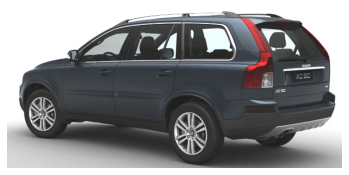

In [6]:
image = mpimg.imread(os.path.join(DATA_TRAIN_PATH, 'Volvo XC90 SUV 2007/00954.jpg'))
plt.imshow(image)
plt.axis('off')
plt.show()

## create generator

In this step, we will use the Keras `ImageDataGenerator` methods for loading and transform the images of the dataset. With these methods, we don't need to load the entire image dataset in memory.

In [7]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_datagen_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                       rotation_range=40,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode="nearest")
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH,
                                                      target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                      batch_size=BATCH_SIZE,
                                                      class_mode='categorical')
train_generator_aug  = train_datagen_aug.flow_from_directory(DATA_TRAIN_PATH,
                                                              target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                              batch_size=BATCH_SIZE,
                                                              class_mode='categorical')
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


## Part A: build and train model without using data augmentation

In [ ]:
def build_model():
    model = keras.Sequential()
    model.add(ResNet50(input_shape=(IMG_WIDTH, IMG_HEIGHT, 3), include_top = False, pooling = 'avg', weights = None))
    model.add(keras.layers.Dense(n_classes, activation = 'softmax'))
    return model

In [ ]:
model = build_model()
model.summary()
loss = 'categorical_crossentropy'
optimizer = optimizers.Adam()
model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_9 (Dense)              (None, 196)               401604    
Total params: 23,989,316
Trainable params: 23,936,196
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/25
102/102 [==============================] - 107s 1s/step - loss: 6.2340 - accuracy: 0.0065
Epoch 2/25
102/102 [==============================] - 102s 993ms/step - loss: 5.4273 - accuracy: 0.0069
Epoch 3/25
102/102 [==============================] - 100s 981ms/step - loss: 5.2294 - accuracy: 0.0134
Epoch 4/25
102/102 [==============================] - 100s 978ms/step - loss: 5.1393 - accuracy: 0.0163
Epoch 5/25
102/102 [==============================] - 100s 978ms/step - loss: 5.0484 -

In [ ]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)

101/101 [==============================] - 85s 833ms/step - loss: 5.6033 - accuracy: 0.1897


[5.603324890136719, 0.18965302407741547]

## Part B: train model using data augmentation

In [ ]:
model = build_model()
loss = 'categorical_crossentropy'
optimizer = optimizers.Adam()
model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
model.fit(train_generator_aug, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/50
102/102 [==============================] - 1122s 11s/step - loss: 6.2574 - accuracy: 0.0071
Epoch 2/50
102/102 [==============================] - 171s 2s/step - loss: 5.3034 - accuracy: 0.0104
Epoch 3/50
102/102 [==============================] - 172s 2s/step - loss: 5.2293 - accuracy: 0.0182
Epoch 4/50
102/102 [==============================] - 172s 2s/step - loss: 5.1579 - accuracy: 0.0157
Epoch 5/50
102/102 [==============================] - 171s 2s/step - loss: 5.0742 - accuracy: 0.0225
Epoch 6/50
102/102 [==============================] - 172s 2s/step - loss: 4.9727 - accuracy: 0.0285
Epoch 7/50
102/102 [==============================] - 172s 2s/step - loss: 4.9005 - accuracy: 0.0351
Epoch 8/50
102/102 [==============================] - 171s 2s/step - loss: 4.8392 - accuracy: 0.0393
Epoch 9/50
102/102 [==============================] - 174s 2s/step - loss: 4.7329 - accuracy: 0.0454
Epoch 10/50
102/102 [==============================] - 174s 2s/step - loss: 4.6449 - accu

In [ ]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)

101/101 [==============================] - 1793s 18s/step - loss: 3.3639 - accuracy: 0.4257


[3.3639113903045654, 0.4256933331489563]

## Part C: build and train model using data augmentation and pretrained resnet50

In [8]:
def build_model_with_resnet50():
    resnet_model = ResNet50(input_shape=(IMG_WIDTH, IMG_HEIGHT, 3), include_top = False, pooling = 'avg', weights = 'imagenet')
    model = keras.Sequential()
    model.add(resnet_model)
    model.add(keras.layers.Dense(1024, activation = 'relu'))
    model.add(keras.layers.Dense(n_classes, activation = 'softmax'))
    for layer in resnet_model.layers:
        layer.trainable = False
    return model

In [6]:
utils.plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True)

In [ ]:
model = build_model_with_resnet50()
loss = 'categorical_crossentropy'
optimizer = optimizers.Adam()
model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
model.fit(train_generator_aug, validation_data=test_generator,epochs=50, batch_size=BATCH_SIZE)

94773248/94765736 [==============================] - 1s 0us/step
Epoch 1/45
102/102 [==============================] - 4320s 42s/step - loss: 5.2729 - accuracy: 0.0264
Epoch 2/45
 40/102 [==========>...................] - ETA: 12:22 - loss: 4.0153 - accuracy: 0.1378

In [1]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)

NameError: ignored

In [ ]:
def build_model_with_resnet50_fine_tuning():
    resnet_model = ResNet50(input_shape=(IMG_WIDTH, IMG_HEIGHT, 3), include_top = False, pooling = 'avg', weights = 'imagenet')
    model = keras.Sequential()
    model.add(resnet_model)
    model.add(keras.layers.Dense(1024, activation = 'relu'))
    model.add(keras.layers.Dense(n_classes, activation = 'softmax'))
    for layer in resnet_model.layers[:146]:
        layer.Trainable = False

    return model

In [ ]:
model = build_model_with_resnet50_fine_tuning()
loss = 'categorical_crossentropy'
optimizer = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
model.fit(train_generator_aug, validation_data=test_generator, epochs=35, batch_size=BATCH_SIZE)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
102/102 [==============================] - 185s 2s/step - loss: 5.3576 - accuracy: 0.0000e+00
Epoch 2/30
 96/102 [===========================>..] - ETA: 10s - loss: 3.9697 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)